<div style="background-color: #2020D1; padding: 40px; border-radius: 10px; color: #FFFFFF; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">🏦 MULTI-LAYER NEURAL NETWORK CREDIT RISK PREDICTION </h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;">Precision: 0.XX &nbsp;&nbsp; Accuracy: 0.YY</p>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTitfBKMcp-K-Yu_9wTbUVAro0EzqSyCVIVUw&usqp=CAU" alt="GIF" style="width: 400px; margin: 20px auto;">
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<!-- Bank Money Theme -->
<div style="border-radius: 0px; border: 2px solid #2020ff; padding: 15px; background-color: #2020d1; font-size: 120%; text-align: center; color: #FFFFFF; font-weight: bold;">
   Table of Contents
</div>


* [1. 💾 Import Libraries](#1.-Import-Libraries)

* [2. 📑 Read and Explain Dataset](#2.-Read-and-Explain-Dataset)

* [3. 📊 Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

* [4. 🎯 Dealing with Outliers](#4.-Dealing-with-Outliers)

* [5. 💡 Feature Engineering](#5.-Feature-Engineering)

* [6. 🛠️ Data Preprocessing](#6.-Data-Preprocessing)

* [7. 🌴 ML Classification Models](#7.-ML-Classification-Models)

* [8. ⚙️ Hyperparameter Tuning](#8.-Hyperparameter-Tuning)

* [9. 🚀 Training Final Model](#9.-Training-Final-Model)

* [10. 🤖 Build Multi layer Graph](#10.-Build-Multi-layer-Graph)

## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">1. Import Libraries</div>

In [18]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import shap

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings
warnings.filterwarnings("ignore")



## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">2. Read and Explain Dataset</div>

In [19]:
#Read data
#data_original =  pd.read_csv("https://raw.githubusercontent.com/VictorNico/INFO4017_22_23_UYI/DS/credit_risk_dataset.csv")
data_original =  pd.read_csv("./datasets/credit_risk_dataset.csv")
data = data_original.copy()


# Print sample
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

<div style="background-color: #2020d1; padding: 10px; border-radius: 10px; color: #FFFFFF; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Feature Descriptions</h1>
</div>

<div style="background-color: #FFFFFF; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;; color: #2026d1">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>


## <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">3. Exploratory Data Analysis</div>

In [20]:
data.shape

(32581, 12)

In [21]:
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [22]:
data.tail()

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

In [23]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [25]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [26]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [27]:
data.duplicated().sum()

165

In [28]:
data.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

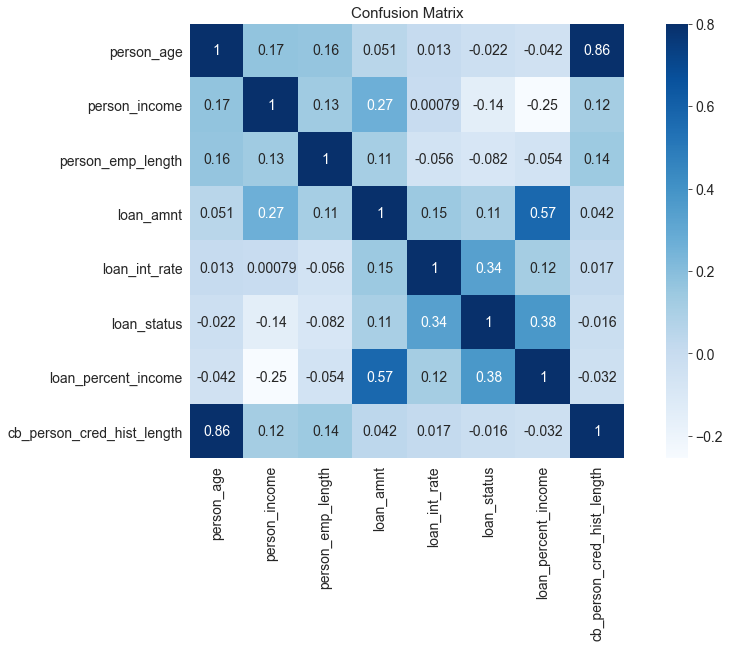

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion Matrix',fontsize=15);

!pip install dython

#Study correlation between categorial features
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(data)
categorical_features

#generate correlation matrix
associations(dataset, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', bias_correction=True, nan_strategy=_REPLACE, nan_replace_value=_DEFAULT_REPLACE_VALUE, ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

#get a full data correlation between features
complete_correlation= associations(data, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [30]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#2020d1; color: #FFFFFF;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')


In [31]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

## Univarient Analysis

In [32]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66, float('inf')])




maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98
Age between 67 and inf: Number of people 26


In [33]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])


maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [34]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])


maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [35]:
%matplotlib inline
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Plasma,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#2020d1', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='white'
fig.show()

**Observations: Most of the People taking a loan doesnt own their own house**


In [36]:
%matplotlib inline
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Plasma,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#2020d1', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='white'
fig.show()

**Observations: Loan Grade A and B comprises of 65.2% of total**

In [37]:
%matplotlib inline
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout()
fig.show()

**Observations:Loan Intent are equally almost distributed**

In [38]:
%matplotlib inline
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout()
fig.show()

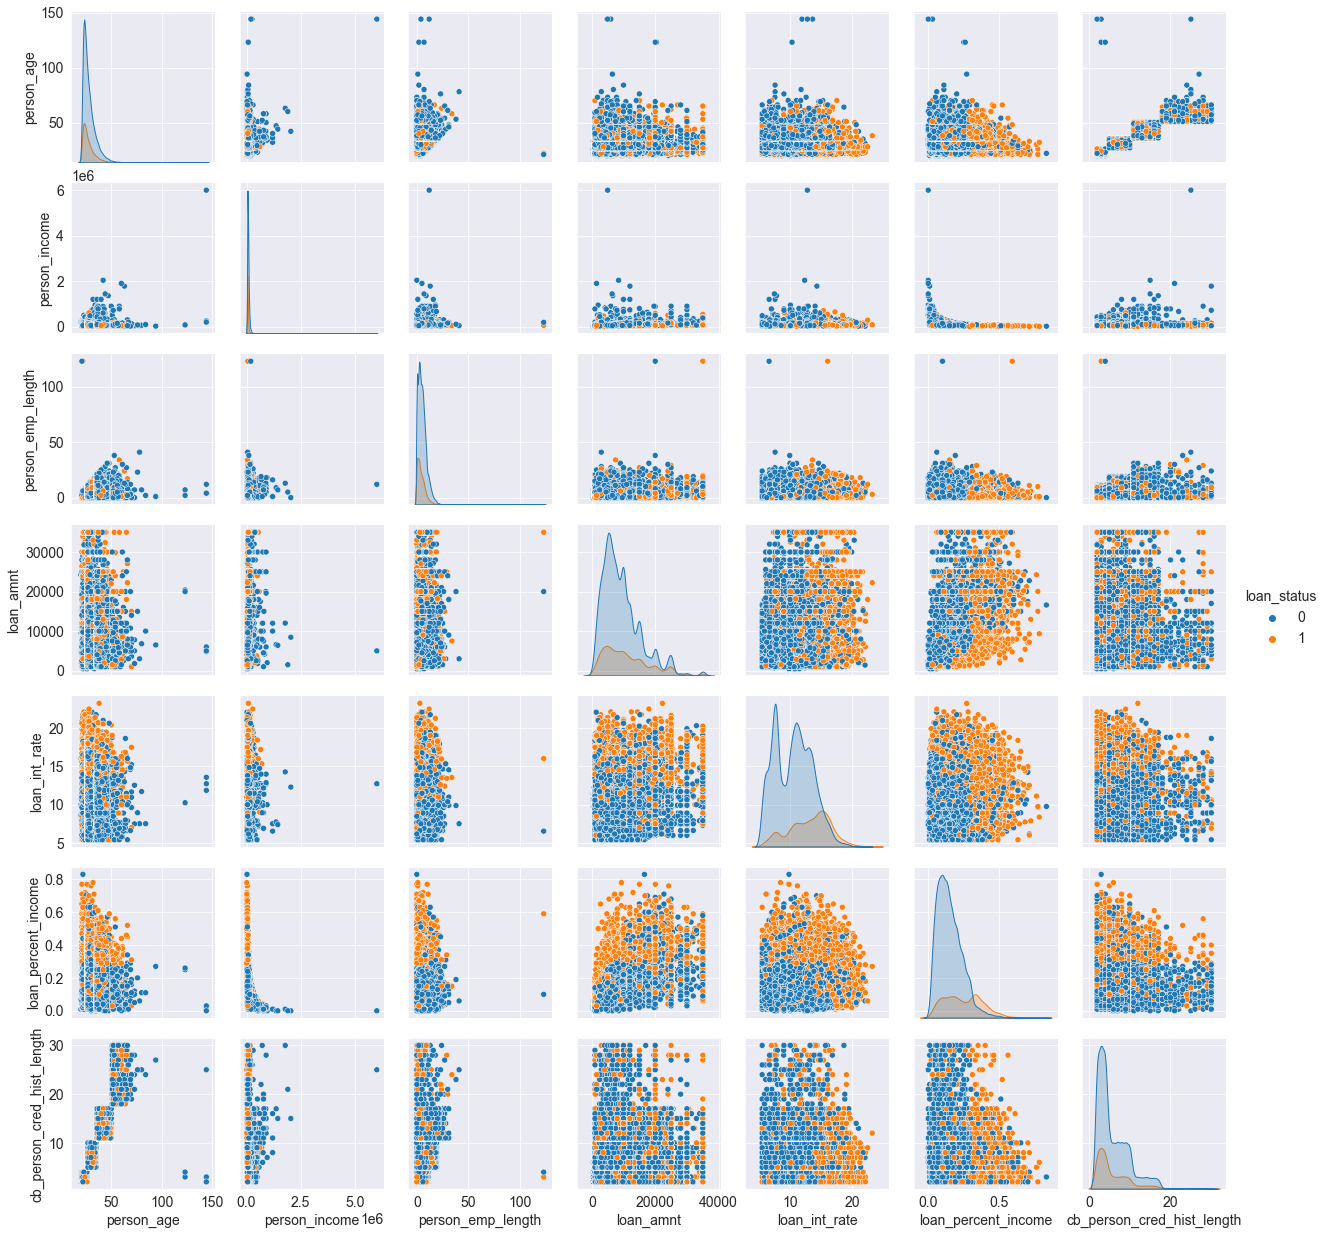

In [39]:
sns.pairplot(data,hue="loan_status")

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">4. Dealing with Outliers</div>

In [40]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [41]:

data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].quantile(0.5))
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].quantile(0.5))

# drop values that are null
# data.dropna(axis=0,inplace=True)

In [42]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [43]:
data['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [44]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32581.000000  32581.000000         32581.000000   
mean       11.009620      0.218164             0.170203   
std         3.081611      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.110000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [45]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

<BarContainer object of 58 artists>

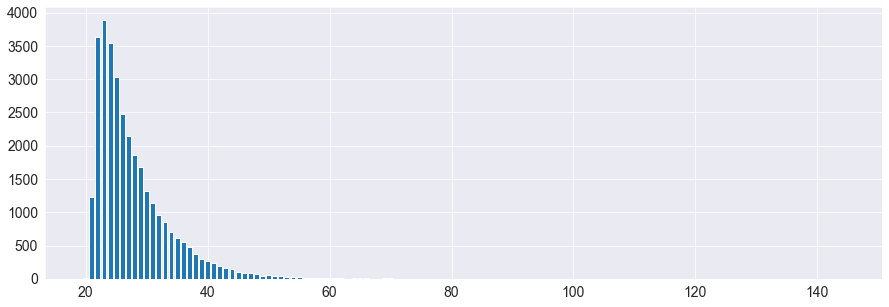

In [46]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">5. Feature Engineering</div>

In [47]:
#data['age_group'] = pd.cut(data['person_age'],
#                           bins=[19, 26, 36, 46, 56, 66, 145],
#                           labels=['19-25', '26-35', '36-45', '46-55', '56-65', '66-144'])

In [48]:
#data['age_group'].dtype

In [49]:
#data.head()

## **Income Group**

In [50]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [51]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
32576         middle
32577           high
32578    high-middle
32579           high
32580     low-middle
Name: income_group, Length: 32581, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [52]:
data.head()

index  person_age  person_income person_home_ownership  person_emp_length  \
0      0          22          59000                  RENT              123.0   
1      1          21           9600                   OWN                5.0   
2      2          25           9600              MORTGAGE                1.0   
3      3          23          65500                  RENT                4.0   
4      4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                         Y                           3   
1                 0.10                         N                           2   
2                 0.57                         N                           3   
3                 0.53                         N                           2   
4                 0.55                         Y                           4   

  income_group  
0       middle  
1          low  
2          low  
3       middle  
4       middle

## **Loan Amount**

In [53]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [54]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
32576        medium
32577    very large
32578    very large
32579         large
32580        medium
Name: loan_amount_group, Length: 32581, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [55]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [56]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [57]:
data['person_home_ownership'].value_counts()


RENT        16445
MORTGAGE    13443
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [58]:
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0   EDUCATION          B       1000          11.14            0   
1     MEDICAL          C       5500          12.87            1   
2     MEDICAL          C      35000          15.23            1   
3     MEDICAL          C      35000          14.27            1   
4     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.10                         N                           2   
1                 0.57                         N                           3   
2                 0.53                         N                           2   
3                 0.55                         Y                           4   
4                 0.25                         N                           2   

  income_group loan_amount_group  
0          low             small  
1          low            medium  
2       middle        very large  
3       middle        very large  
4          low             small

In [59]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [60]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [71]:
col_list = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_grade',
    'loan_amnt',
    'loan_int_rate',
    'loan_status',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length',
    #'age_group',
    'income_group',
    'loan_amount_group',
    'loan_to_income_ratio',
    'loan_to_emp_length_ratio',
    'int_rate_to_loan_amt_ratio']


ordinal_factor_colums = [
    'loan_grade',
    'income_group',
    'loan_amount_group']

nominal_factor_colums = [
    'person_home_ownership',
    'loan_intent',
    'cb_person_default_on_file',
    #'age_group'
]

numeric_uniform_colums = [
    'loan_amnt',
    'loan_int_rate',
    'person_income',
    'loan_percent_income',
    'loan_to_income_ratio',
    'loan_to_emp_length_ratio',
    'int_rate_to_loan_amt_ratio']

numeric_with_outliers_columns = [
    'person_age',
    'person_emp_length',
    'cb_person_cred_hist_length']

check = ordinal_factor_colums.copy()
check.extend(nominal_factor_colums)
check.extend(numeric_uniform_colums)
check.extend(numeric_with_outliers_columns)
print("Good") if len(list(set(col_list)-set(check)) if len(check) <= len(col_list) else list(set(check)-set(col_list))) == 1 else print(f"Error")

Good


# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">6. Data Preprocessing</div>


In [72]:
# utils functions
import time
import joblib

def numeric_standardization_with_outliers(data, variables_list):
    dataframe = data.copy()
    # 1) for each variable
    for var in variables_list:
        # a) compute Q1 and Q3
        Q1 = dataframe[var].quantile(0.25)
        Q3 = dataframe[var].quantile(0.75)
        # b) compute IQR
        IQR = Q3 - Q1
        # c) compute sup and inf
        sup = Q3 + (1.5 * IQR)
        inf = Q1 - (1.5 * IQR)
        for line in dataframe.index.values.tolist():
            # if less than inf
            if dataframe.loc[line, var] < inf:
                dataframe.loc[line, var] = inf/sup
            # else greater than sup
            elif dataframe.loc[line, var] > sup:
                dataframe.loc[line, var] = 1
            # else
            else:
                dataframe.loc[line, var] = dataframe.loc[line, var]/sup
    return dataframe

def numeric_uniform_standardization(data, variables_list):
    dataframe = data.copy()
    # 1) for each variable
    for var in variables_list:
        # get maximum value
        maxi = dataframe[var].max()
        dataframe[var] = dataframe[var]/maxi
    return dataframe

def ordinal_factor_encoding(data, variables_list):
    dataframe = data.copy()
    from sklearn.preprocessing import LabelEncoder
    # 1) for each variable
    for var in variables_list:
        label_encoder = LabelEncoder()
        dataframe[var] = label_encoder.fit_transform(dataframe[var])
    return dataframe

def nominal_factor_encoding(data, variables_list):
    dataframe = data.copy()
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(dataframe[variables_list])
    merge_ohe_col = np.concatenate((ohe.categories_)) # list of all new dimension names
    ohe_data = pd.DataFrame(ohe.transform(dataframe[variables_list]).toarray(), columns=merge_ohe_col) # make the one hot encoding and save the result inside a temp source
    dataframe = pd.concat([ohe_data, dataframe], axis=1) #  concat existing and news columns dimensions
    dataframe = dataframe.drop(variables_list, axis=1) # remove all nominal unencoded dimensions
    return (dataframe, ohe.categories_)

def save_model(clf, clf_name):
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './model_storage/'+clf_name+'_'+timestr+'.sav'
    joblib.dump(clf, filename)

def save_graph(graph, name, rows_len, cols_len):
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './graph_storage/'+name+'_'+str(rows_len)+'_'+str(cols_len)+'_'+timestr+'.gml.gz'
    nx.write_gml(graph, filename)

def save_digraph(graph, name, rows_len, cols_len):
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './graph_storage/'+name+'_'+str(rows_len)+'_'+str(cols_len)+'_'+timestr+'.gml.gz'
    nx.write_graphml_lxml(graph, filename)
    
def save_dataset(dataframe, name):
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './data_selection_storage/'+name+'_'+timestr+'.csv'
    dataframe.to_csv(filename, sep='\t', encoding='utf-8')
    
def read_model(filename):
    return joblib.load(filename)

def read_graph(filename):
    return nx.read_gml(filename)

def read_digraph(filename):
    return nx.read_graphml_lxml(graph, filename)
    
def read_dataset(filename):
    return pd.read_csv(filename, sep='\t', encoding='utf-8',index_col=0)

In [73]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
income_group                  0
loan_amount_group             0
loan_to_income_ratio          0
loan_to_emp_length_ratio      0
int_rate_to_loan_amt_ratio    0
dtype: int64

In [74]:
DATA_OHE, OHE = nominal_factor_encoding(data, nominal_factor_colums)

In [75]:
DATA_OHE_LB = ordinal_factor_encoding(DATA_OHE,ordinal_factor_colums)
save_dataset(DATA_OHE_LB, 'DATA_OHE_LB')

In [76]:
DATA_OHE_LB_LBU = numeric_uniform_standardization(DATA_OHE_LB,ordinal_factor_colums)
save_dataset(DATA_OHE_LB_LBU, 'DATA_OHE_LB_LBU')

In [77]:
DATA_OHE_LB_LBU_STDU = numeric_uniform_standardization(DATA_OHE_LB_LBU,numeric_uniform_colums)
save_dataset(DATA_OHE_LB_LBU_STDU, 'DATA_OHE_LB_LBU_STDU')

In [78]:
DATA_OHE_LB_LBU_STDU_STDWO = numeric_uniform_standardization(DATA_OHE_LB_LBU_STDU,numeric_with_outliers_columns)
save_dataset(DATA_OHE_LB_LBU_STDU_STDWO, 'DATA_OHE_LB_LBU_STDU_STDWO')

In [79]:
OHE

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [82]:
original_col = np.concatenate(([
    'income_group',
    'loan_amount_group',
    'loan_to_income_ratio',
    'loan_to_emp_length_ratio',
    'int_rate_to_loan_amt_ratio'], []))
original_col

array(['income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='<U32')

In [83]:
DATA_ORIGIN = DATA_OHE_LB_LBU_STDU_STDWO.drop(original_col, axis=1)
DATA_ORIGIN.reset_index(inplace = True)
DATA_ORIGIN = DATA_ORIGIN.drop(['index'], axis=1)
save_dataset(DATA_ORIGIN, 'DATA_ORIGIN')

In [84]:
DATA_ORIGIN.columns

Index(['MORTGAGE', 'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'N', 'Y',
       'person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [85]:
DATA_OHE_LB_LBU_STDU_STDWO.describe()

MORTGAGE         OTHER           OWN          RENT  \
count  32579.000000  32579.000000  32579.000000  32579.000000   
mean       0.412628      0.003284      0.079315      0.504773   
std        0.492314      0.057216      0.270234      0.499985   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000   
75%        1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       DEBTCONSOLIDATION     EDUCATION  HOMEIMPROVEMENT       MEDICAL  \
count       32579.000000  32579.000000     32579.000000  32579.000000   
mean            0.159980      0.198072         0.110654      0.186347   
std             0.366593      0.398553         0.313708      0.389392   
min             0.000000      0.000000         0.000000      0.000000   
25%             0.000000      0.000000         0.000000      0.000000   
50%             0.000000      0.000000         0.000000      0.000000   
75%             0.000000      0.000000         0.000000      0.000000   
max             1.000000      1.000000         1.000000      1.000000   

           PERSONAL       VENTURE  ...     loan_amnt  loan_int_rate  \
count  32579.000000  32579.000000  ...  32579.000000   32579.000000   
mean       0.169434      0.175512  ...      0.273951       0.474143   
std        0.375141      0.380410  ...      0.180584       0.132708   
min        0.000000      0.000000  ...      0.014286       0.233419   
25%        0.000000      0.000000  ...      0.142857       0.365633   
50%        0.000000      0.000000  ...      0.228571       0.473299   
75%        0.000000      0.000000  ...      0.348571       0.564599   
max        1.000000      1.000000  ...      1.000000       1.000000   

        loan_status  loan_percent_income  cb_person_cred_hist_length  \
count  32579.000000         32579.000000                32579.000000   
mean       0.218147             0.205052                    0.193478   
std        0.412994             0.128625                    0.135169   
min        0.000000             0.000000                    0.066667   
25%        0.000000             0.108434                    0.100000   
50%        0.000000             0.180723                    0.133333   
75%        0.000000             0.277108                    0.266667   
max        1.000000             1.000000                    1.000000   

       income_group  loan_amount_group  loan_to_income_ratio  \
count  32579.000000       32579.000000          32579.000000   
mean       0.636384           0.468594              0.205473   
std        0.344593           0.319636              0.128947   
min        0.000000           0.000000              0.000951   
25%        0.250000           0.333333              0.107975   
50%        0.750000           0.333333              0.178492   
75%        1.000000           0.666667              0.276104   
max        1.000000           1.000000              1.000000   

       loan_to_emp_length_ratio  int_rate_to_loan_amt_ratio  
count              32579.000000                32579.000000  
mean                   0.036787                    0.082507  
std                    0.051167                    0.082141  
min                    0.000000                    0.008750  
25%                    0.009524                    0.035057  
50%                    0.022222                    0.056383  
75%                    0.045351                    0.096319  
max                    1.000000                    1.000000  

[8 rows x 26 columns]

In [86]:
from sklearn.model_selection import train_test_split
def test_train(dataframe, target, test_size=0.2, random_state=12):
    X = dataframe.drop([target], axis=1)
    Y = dataframe[target]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    #save_dataset(x_train, 'x_train')
    x_train.reset_index(inplace = True)
    x_test.reset_index(inplace = True)

    x_train = x_train.drop(['index'], axis=1)
    x_train.reset_index(inplace = True)
    x_train = x_train.drop(['index'], axis=1)

    x_test = x_test.drop(['index'], axis=1)
    x_test.reset_index(inplace = True)
    x_test = x_test.drop(['index'], axis=1)

    return x_train, x_test, y_train, y_test


# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">7. ML Classification Models</div>


In [87]:
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#from catboost import CatBoostClassifier
#import lightgbm as lgb
#from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier

In [140]:
svc = SVC(kernel = 'linear')
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
#mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
#abc = AdaBoostClassifier()
#bc = BaggingClassifier()
#etc = ExtraTreesClassifier()
#gbdt = GradientBoostingClassifier()
xgb = XGBClassifier(booster = 'gbtree')
#cat = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1,verbose=0) #
#lgb = lgb.LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265)

#

In [154]:
clfs = {
        'sv' :svc,
        'xgb':xgb,
        'dtc':dtc,
        'lrc':lrc,
        'rfc':rfc,
        #'knn':knc
    }

In [166]:
from sklearn.metrics import precision_score,accuracy_score,f1_score, recall_score

def init_training_store(dataframe):
    cols = dataframe.columns.to_list()
    #print(cols)
    cols.extend([
        'precision',
        'accuracy',
        'recall',
        'f1-score'
    ])
    return pd.DataFrame(columns=cols)

def get_xgb_imp(xgb):
    imp_vals = xgb.get_booster().get_fscore()
    total = sum(imp_vals.values())
    return {k:v/total for k,v in imp_vals.items()}

def save_shap(clf, name, x_test):
    explainer = shap.Explainer(clf.predict, x_test)
    shap_values = explainer(x_test)
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './plots/shap_summary_'+name+'_'+timestr+'.png'
    shap.summary_plot(shap_values,show=False)
    plt.savefig(filename,dpi=700) #.png,.pdf will also support here
    filename1 = './plots/shap_bar_'+name+'_'+timestr+'.png'
    shap.plots.bar(shap_values,show=False)
    plt.savefig(filename1,dpi=700) #.png,.pdf will also support here

def train_classifier(name, clf,X_train,y_train,X_test,y_test, store, domain):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred, average='macro')
    f1_score_r = f1_score(y_test,y_pred, average='macro')
    
    save_model(clf, name+'_'+domain)
    if 'lr' in name or 'sv' in name:
        #print(f"support_vectors_:{clf.support_vectors_} dual_coef_{clf.dual_coef_}")
        vals = list(clf.coef_[0])
        #print(f"len {len(vals)}")
        #print(vals)
        vals.extend([precision,accuracy,recall,f1_score_r])
        keys = X_train.columns.to_list()
        keys.extend([
            'precision',
            'accuracy',
            'recall',
            'f1-score'
        ])
        #print(f"{name} keys:{len(keys)} vals:{len(vals)}")
        store = store.append(
                    pd.Series(
                        vals, 
                        index=keys,
                        name= name
                    )
                    #.sort_values(ascending=False)
                )
        store.fillna(0, inplace=True)
        #print(f"{store.isna().sum()} ---")
        save_dataset(store, name+'_'+domain)
    elif 'rf' in name or 'dt' in name or 'kn' in name:
        vals = list(clf.feature_importances_)
        #print(f"len {len(vals)}")
        vals.extend([precision,accuracy,recall,f1_score_r])
        keys = X_train.columns.to_list()
        keys.extend([
            'precision',
            'accuracy',
            'recall',
            'f1-score'
        ])
        #print(f"{name} keys:{len(keys)} vals:{len(vals)}")
        store = store.append(
                    pd.Series(
                        vals, 
                        index=keys,
                        name= name
                    )
                    #.sort_values(ascending=False)
                )
        store.fillna(0, inplace=True)
        #print(f"{store.isna().sum()} +++")
        save_dataset(store, name+'_'+domain)
    elif 'xg' in name:
        vals = get_xgb_imp(clf)
        keys = list(vals.keys())
        vals = list(vals.values())
        keys.extend([
                'precision',
                'accuracy',
                'recall',
                'f1-score'
            ])
        vals.extend([precision,accuracy,recall,f1_score_r])
        #print(f"{name} keys:{len(keys)} vals:{len(vals)}")
        store = store.append(
                    pd.Series(
                        vals, 
                        index=keys,
                        name= name
                    )
                    #.sort_values(ascending=False)
                )
        store.fillna(0, inplace=True)
        #print(f"{store.isna().sum()} ***")
        save_dataset(store, name+'_'+domain)
    
    return accuracy,precision,store,clf

In [167]:


def train(clfs,x_train,y_train,x_test,y_test, store, domain):
    expots= []
    for name,clf in clfs.items():
        
        current_accuracy,current_precision, store, classifier = train_classifier(name, clf, x_train,y_train,x_test,y_test, store, domain)
        expots.append((classifier, x_test, name))
        print("For ",name)
        print("Accuracy - ",current_accuracy)
        print("Precision - ",current_precision)
    return expots

def call_shap(classifier, x_test, name):
    save_shap(classifier, name, x_test)


# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">10. Build Multi layer Graph</div>

[image.png](https://media.licdn.com/dms/image/D4E12AQHGcUY5OQkCuw/article-cover_image-shrink_600_2000/0/1671270073854?e=2147483647&v=beta&t=wG3rrat05emDAqJBol42VIv_T8kAuK0sTd3GVuTpogY)

In [92]:
"""
    @Description Matrix 2D type checkin
    @Methods matrix_2d_test
    @Params matrix - 2D Matrix to check out
    @Return flag: True if it's a 2D Matrix anf False else
"""
def matrix_2d_test(matrix):
    flag = False
    if isinstance(matrix, list):
        if isinstance(matrix[0], list):
            intern_flag =True
            for row in matrix:
                if len(row) != len(matrix):
                    intern_flag = False
            flag = intern_flag
    return flag

"""
    @Description Entity nodes list generation
    @Methods generate_entity_nodes_list
    @Params data - a source of data which be a dataframe, series, list or 2D matrix
    @Return NODE_LIST
"""
def generate_entity_nodes_list(data):
    NB_ENTITY = 0
    NODE_LIST = []
    if isinstance(data, pd.DataFrame):
        NB_ENTITY = data.shape[0]
    if isinstance(data, pd.Series):
        NB_ENTITY = data.size
    """if isinstance(data, list):
        NB_ENTITY = len(data)
    if isinstance(data, list):
        if isinstance(data[0], list):
            if matrix_2d_test(data):"""
    NODE_LIST = [i for i in range(NB_ENTITY)]
    return NODE_LIST

#_DATA = pd.concat([X_new, X_new_test], axis=0)



In [93]:
import networkx as nx

In [94]:
def build_mlg(data, features):
    CRP_G = nx.DiGraph() # create an empty directed graph

    # build edges
    list_of_edges = []
    list_of_nodes = []
    LIST_OF_CUSTOMERS = data.index.values.tolist()
    LEN_OF_FEATURES = len(features)
    colors = [
        '#e6194b',
        '#ffe119',
        '#4363d8',
        '#f58231',
        '#911eb4',
        '#46f0f0',
        '#f032e6',
        '#bcf60c',
        '#fabebe',
        '#008080',
        '#e6beff',
        '#9a6324',
        '#fffac8',
        '#800000',
        '#aafdc9',
        '#808000',
        '#ffd8b1',
        '#000075',
        '#9cb44b',
        '#808080'

    ]
    for el in LIST_OF_CUSTOMERS: #fetch on custumers list
        # layer building
        for i in range(LEN_OF_FEATURES):
            # add nodes
            list_of_nodes.append(('C'+str(i)+'-U-'+str(el),{'color': 'g'}))
            for attr in features[i].tolist(): # fetch on home ownership encode values
                code = f"#{format(255-10*i, '02x')}{format(150+9*i, '02x')}{format(55+10*i, '02x')}"
                if int(data.loc[el,attr]) == 1: # check if exists relation between both
                    # bidirectional relation between home ownership and user
                    list_of_edges.append(('C'+str(i)+'-U-'+str(el),'C'+str(i)+'-M-'+attr, {'color': 'b'})) # add edge to list
                    list_of_edges.append(('C'+str(i)+'-M-'+attr, 'C'+str(i)+'-U-'+str(el), {'color': 'b'})) # add edge to list
                    # add nodes
                    list_of_nodes.append(('C'+str(i)+'-M-'+attr,{'color': colors[i]}))
            # add directed relation between user node from C1 and C2
            list_of_edges.append(('C'+str(i)+'-U-'+str(el),'C'+str(i+1 if i+1 < LEN_OF_FEATURES else i-1)+'-U-'+str(el), {'color': 'r'})) # add edge to list
            list_of_edges.append(('C'+str(i+1 if i+1 < LEN_OF_FEATURES else i-1 )+'-U-'+str(el), 'C'+str(i)+'-U-'+str(el), {'color': 'r'})) # add edge to list

    # add edges to the oriented graph
    print(list_of_nodes)
    CRP_G.add_nodes_from(list_of_nodes)
    CRP_G.add_edges_from(list_of_edges)

    # return the graph
    return CRP_G

In [95]:
# Create Credit Risk Prediction bipartite graph
# x_train, x_test, y_train, y_test = test_train(DATA_OHE_LB_LBU_STDU_STDWO,'loan_status',test_size=0.2,random_state=12)
CRP_G = build_mlg(DATA_OHE_LB_LBU_STDU_STDWO, [OHE[0],OHE[1]])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [96]:
save_graph(CRP_G, 'ml_graph', DATA_OHE_LB_LBU_STDU_STDWO.shape[0], len(OHE[0])+len(OHE[1]))

In [97]:
# show
#colors = nx.get_edge_attributes(CRP_G,'color').values()
#colorsN = nx.get_node_attributes(CRP_G,'color').values()
#nx.draw(
#    CRP_G,
#    edge_color=colors,
#    node_color=colorsN,
#    with_labels=True)
#plt.show()

In [98]:
def find_indices(list_to_check, item_to_find):
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]

def build_modalities_graph(X,Y,n):
    CRP_G = nx.DiGraph() # create an empty directed graph

    # join X and Y
    data = X.copy()
    data.astype('int')
    temp = data.copy()
    data["CLASS"] = Y.values
    data = data.head(n)

    # cast columns type to int
    data.astype('int')



    # build edges
    LIST_OF_CUSTOMERS = data.index.values.tolist()
    for el in LIST_OF_CUSTOMERS: #fetch on custumers list
        # find all columns belong to customer
        LINE = temp.loc[el,].values
        COLUMNS_BELONG = find_indices(LINE,1)

        # create edges
        COLUMNS = X.columns
        for i, col in enumerate(COLUMNS_BELONG): # fetch belong columns
            #print([i for i in range(i+1,len(COLUMNS_BELONG))], COLUMNS_BELONG)
            for j in range(i+1,len(COLUMNS_BELONG)): # fetch successor
                #if j < len(COLUMNS_BELONG) - 1: # check if it's the last column
                if CRP_G.has_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[j]]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[col]][COLUMNS[COLUMNS_BELONG[j]]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[j]], weight=1)

                if CRP_G.has_edge(COLUMNS[COLUMNS_BELONG[j]], COLUMNS[col]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[COLUMNS_BELONG[j]]][COLUMNS[col]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[COLUMNS_BELONG[j]], COLUMNS[col], weight=1)

            """if i == len(COLUMNS_BELONG) - 2: # check if it's the last column
                if CRP_G.has_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[i+1]]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[col]][COLUMNS[COLUMNS_BELONG[i+1]]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[i+1]], weight=1)

                if CRP_G.has_edge(COLUMNS[COLUMNS_BELONG[i+1]], COLUMNS[col]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[COLUMNS_BELONG[i+1]]][COLUMNS[col]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[COLUMNS_BELONG[i+1]], COLUMNS[col], weight=1)"""



            # add to class
            CLASS = data.loc[el,'CLASS']
            if CRP_G.has_edge(COLUMNS[col], CLASS):
                # we added this one before, just increase the weight by one
                CRP_G[COLUMNS[col]][CLASS]['weight'] += 1
            else:
                # new edge. add with weight=1
                CRP_G.add_edge(COLUMNS[col], CLASS, weight=1)

            if CRP_G.has_edge(CLASS, COLUMNS[col]):
                # we added this one before, just increase the weight by one
                CRP_G[CLASS][COLUMNS[col]]['weight'] += 1
            else:
                # new edge. add with weight=1
                CRP_G.add_edge(CLASS, COLUMNS[col], weight=1)




    # return the graph
    return CRP_G, data

In [99]:
MODALITIES_GRAPHE, datas = build_modalities_graph(DATA_OHE_LB_LBU_STDU_STDWO[np.concatenate((OHE[0],OHE[1]))], DATA_OHE_LB_LBU_STDU_STDWO['loan_status'], DATA_OHE_LB_LBU_STDU_STDWO.shape[0])
#nx.write_graphml_lxml(MODALITIES_GRAPHE, "./graph_storage/MODALITIES_GRAPHE.gml.gz")
save_digraph(MODALITIES_GRAPHE, 'modality_graph', DATA_OHE_LB_LBU_STDU_STDWO.shape[0], len(OHE[0])+len(OHE[1]))

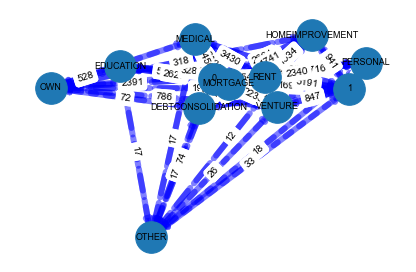

In [100]:

elarge = [(u, v) for (u, v, d) in MODALITIES_GRAPHE.edges(data=True) if d["weight"] > datas.shape[0] // 4]
esmall = [(u, v) for (u, v, d) in MODALITIES_GRAPHE.edges(data=True) if d["weight"] <= datas.shape[0] // 4]

pos = nx.spring_layout(MODALITIES_GRAPHE)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(MODALITIES_GRAPHE, pos, node_size=1000)

# edges
nx.draw_networkx_edges(MODALITIES_GRAPHE, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    MODALITIES_GRAPHE, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(MODALITIES_GRAPHE, pos, font_size=9, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(MODALITIES_GRAPHE, "weight")
nx.draw_networkx_edge_labels(MODALITIES_GRAPHE, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [101]:
datas

MORTGAGE  OTHER  OWN  RENT  DEBTCONSOLIDATION  EDUCATION  \
0           0.0    0.0  1.0   0.0                0.0        1.0   
1           1.0    0.0  0.0   0.0                0.0        0.0   
2           0.0    0.0  0.0   1.0                0.0        0.0   
3           0.0    0.0  0.0   1.0                0.0        0.0   
4           0.0    0.0  1.0   0.0                0.0        0.0   
...         ...    ...  ...   ...                ...        ...   
32574       1.0    0.0  0.0   0.0                0.0        0.0   
32575       1.0    0.0  0.0   0.0                0.0        0.0   
32576       0.0    0.0  0.0   1.0                0.0        0.0   
32577       1.0    0.0  0.0   0.0                0.0        0.0   
32578       0.0    0.0  0.0   1.0                0.0        0.0   

       HOMEIMPROVEMENT  MEDICAL  PERSONAL  VENTURE  CLASS  
0                  0.0      0.0       0.0      0.0      0  
1                  0.0      1.0       0.0      0.0      1  
2                  0.0      1.0       0.0      0.0      1  
3                  0.0      1.0       0.0      0.0      1  
4                  0.0      0.0       0.0      1.0      1  
...                ...      ...       ...      ...    ...  
32574              0.0      0.0       1.0      0.0      0  
32575              0.0      0.0       1.0      0.0      0  
32576              1.0      0.0       0.0      0.0      1  
32577              0.0      0.0       1.0      0.0      0  
32578              0.0      1.0       0.0      0.0      0  

[32579 rows x 11 columns]

#### Binome page rank

In [102]:
modal_combine = nx.pagerank(MODALITIES_GRAPHE, alpha=0.85)

In [103]:
#save_dataset(pd.DataFrame(modal_combine.items(), columns=modal_combine.keys()), 'modal_combine')

In [104]:
bipart_combine = nx.pagerank(CRP_G, alpha=0.85)

In [105]:
#save_dataset(pd.DataFrame(bipart_combine), 'bipart_combine')

In [106]:
"""
    @Description Get intra network nodes
    @Methods get_intra_node_label
    @Params graph - multilayer graph
    @Return labels - list of all intra nodes inside the graph
"""
def get_intra_node_label(graph):
  nodes = graph.nodes()
  intras = [k for k in nodes if '-M-' in k]
  return intras

"""
    @Description Get inter network nodes
    @Methods get_inter_node_label
    @Params graph - multilayer graph
    @Return labels - list of all inter nodes inside the graph
"""
def get_inter_node_label(graph):
  nodes = graph.nodes()
  inters = [k for k in nodes if '-U-' in k]
  return inters

def compute_personlization(node_list):
  personlized = dict()
  a = [ personlized.update({ k : 1/len(node_list) }) for k in node_list ]
  return personlized


In [107]:
# get intra page rank
bipart_intra_pagerank = nx.pagerank(CRP_G,personalization=compute_personlization(get_intra_node_label(CRP_G)), alpha=0.85)
# get inter page rank
bipart_inter_pagerank = nx.pagerank(CRP_G,personalization=compute_personlization(get_inter_node_label(CRP_G)), alpha=0.85)

In [108]:
#save_dataset(pd.DataFrame(bipart_intra_pagerank), 'bipart_intra_pagerank')
#bipart_intra_pagerank

In [109]:
#save_dataset(pd.DataFrame(bipart_inter_pagerank), 'bipart_inter_pagerank')
#bipart_inter_pagerank

In [110]:
# extract features based on 'person_home_ownership', 'loan_intent'
# for each borrowers get
import collections
# Number of borrowers with the same person_home_ownership
def get_number_of_borrowers_with_same_person_home_ownership(borrower, graph):
    edge = [
          B # return the modaliy
          for (A,B) in graph.edges(['C0-U-' + str(borrower)]) # for each nodes link to my borower's
          if ('C0-M-' in B) and ('C0-U-' + str(borrower) == A) # if clause is respect
      ]
    #print(edge[0][1])
    edges = [
      (A,B) 
      for (A,B) in graph.edges(edge)]
    #print(edges)
    return [edges,len(edges) - 1]

#print(get_number_of_borrowers_with_same_person_home_ownership(0,CRP_G))

# Number of borrowers with the same loan_intent
def get_number_of_borrowers_with_same_loan_intent(borrower, graph):
    edge = [
          B # return the modaliy
          for (A,B) in graph.edges(['C1-U-' + str(borrower)]) # for each nodes link to my borower's
          if ('C1-M-' in B) and ('C1-U-' + str(borrower) == A) # if clause is respect
      ]
    #print(edge[0][1])
    edges = [
      (A,B) 
      for (A,B) in graph.edges(edge)]
    #print(edges)
    return [edges,len(edges) - 1]

#print(get_number_of_borrowers_with_same_loan_intent(0,CRP_G))

# intra PR
def get_max_borrower_pr(pr):
    borrower = {}
    for key, val in pr.items():
        if '-U-' in key:
            borrower[int(key.split("-U-")[1])] = max(val, borrower[int(key.split("-U-")[1])]) if int(key.split("-U-")[1]) in borrower else val
    return [val for key, val in collections.OrderedDict(sorted(borrower.items())).items()]
# inter PR

# combine PR

# Number of borrowers with the same loan_intent
def get_number_of_borrowers_with_same_loan_intent_and_same_person_home_ownership(borrower, graph):
    edges_sho = get_number_of_borrowers_with_same_person_home_ownership(borrower, graph)[0] # get the number of borrower with same modality inside each layer
    edges_sli = get_number_of_borrowers_with_same_loan_intent(borrower, graph)[0]

    just_sho_borrowers = [B.split("-U-")[1] for (A,B) in edges_sho] # get index of borrower only inside each layer
    just_sli_borrowers = [B.split("-U-")[1] for (A,B) in edges_sli]


    just_sho_borrowers = set(just_sho_borrowers) # convert the list to set to have values once
    just_sli_borrowers = set(just_sli_borrowers)

    intersection = just_sli_borrowers.intersection(just_sho_borrowers) # compute the intersection of the two sets
    return [
        list(intersection), # convert intersection set to list 
        len(intersection) - 1 # compute the len 
    ]

def get_max_modality_pagerank_score(borrower, graph, modal, pr):
    edges = graph.edges(['C'+str(modal)+'-U-'+str(borrower)]) # get all edges of the borrower
    maxi = 0 # default maxi to 0
    for A, B in edges: # for each edge of the borower in the layer
        if '-U-'+str(borrower) in A and 'C'+str(modal)+'-M-' in B: # verify the form
            maxi = maxi if max(maxi,pr[B]) == maxi else pr[B] # update the max
            #break
    return maxi #return the max

#print(get_number_of_borrowers_with_same_loan_intent_and_same_person_home_ownership(0,CRP_G))
# number of borrowers
def get_persons(dataframe):
    index_users = dataframe.index.values.tolist() # get all index present in the dataset as list
    return index_users # return it

In [111]:

extracts = {}
extracts['person_home_ownership_degree'] = [get_number_of_borrowers_with_same_person_home_ownership(index,CRP_G)[1] for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [112]:
extracts['person_loan_intent_degree'] = [get_number_of_borrowers_with_same_loan_intent(index,CRP_G)[1] for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [113]:
extracts['person_loan_intent_and_home_ownership_degree'] = [get_number_of_borrowers_with_same_loan_intent_and_same_person_home_ownership(index,CRP_G)[1] for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [114]:
extracts['bipart_intra'] = get_max_borrower_pr(bipart_intra_pagerank)

In [115]:
extracts['bipart_inter'] = get_max_borrower_pr(bipart_inter_pagerank)

In [116]:
extracts['bipart_combine'] = get_max_borrower_pr(bipart_combine)

In [117]:
extracts['bipart_intra_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G, 1, bipart_intra_pagerank) for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [118]:
extracts['bipart_inter_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G, 1, bipart_inter_pagerank) for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [119]:
extracts['bipart_combine_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G, 1, bipart_combine) for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [120]:
extracts['bipart_intra_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G, 0, bipart_intra_pagerank) for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [121]:
extracts['bipart_inter_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G, 0, bipart_inter_pagerank) for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [122]:
extracts['bipart_combine_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G, 0, bipart_combine) for index in get_persons(DATA_OHE_LB_LBU_STDU_STDWO)]

In [123]:
# standardization of new features
def standard_extraction(extracts, feats):
    for key in feats:
        extracts[key] = [el/max(extracts[key]) for el in extracts[key]]


In [124]:
standard_extraction(extracts, extracts.keys())
#print("""
#  {}
#  """.format(extracts))

In [125]:
def inject_features_extracted(data,features):
  dataframe = data.copy()
  for key, val in features.items():
    #print(f"{dataframe.shape[0]} --> {len(val)} : {key}")
    dataframe[key] = val
  return dataframe

In [126]:
#weight = nx.get_edge_attributes(MODALITIES_GRAPHE, "weight")
#weight

In [127]:
#DATA_OHE_LB_LBU_STDU_STDWO = read_dataset('./data_selection_storage/DATA_OHE_LB_LBU_STDU_STDWO_2023_09_21_07_21_08.csv')
#DATA_ORIGIN = read_dataset('./data_selection_storage/DATA_ORIGIN_2023_09_21_07_24_25.csv')


In [160]:
save_dataset(DATA_OHE_LB_LBU_STDU_STDWO, 'DATA_OHE_LB_LBU_STDU_STDWO')
save_dataset(DATA_ORIGIN, 'DATA_ORIGIN')

In [168]:
# train without extract features
# with statistic add variables
x_train_1, x_test_1, y_train_1, y_test_1 = test_train(DATA_OHE_LB_LBU_STDU_STDWO,'loan_status',test_size=0.2,random_state=12)
STORE_STD_1 = init_training_store(x_train_1)
Models=train(clfs,x_train_1,y_train_1,x_test_1,y_test_1,STORE_STD_1,'original_statistic')
#print(feature_scores(x_train_1,y_train_1))
#DATA_OHE_LB_LBU_STDU_STDWO.to_csv('./data_selection_storage/DATA_OHE_LB_LBU_STDU_STDWO.csv', sep='\t', encoding='utf-8')
# without it
x1_train_1, x1_test_1, y1_train_1, y1_test_1 = test_train(DATA_ORIGIN,'loan_status',test_size=0.2,random_state=12)
STORE_STD_11 = init_training_store(x1_train_1)
Models.extend(train(clfs,x1_train_1,y1_train_1,x1_test_1,y1_test_1,STORE_STD_11,'original'))
#print(feature_scores(x1_train_1,y1_train_1))
#DATA_ORIGIN.to_csv('./data_selection_storage/DATA_ORIGIN.csv', sep='\t', encoding='utf-8')

For  sv
Accuracy -  0.8614180478821363
Precision -  0.7667410714285714
[09:38:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9353898096992019
Precision -  0.9588910133843213
For  dtc
Accuracy -  0.8876611418047882
Precision -  0.7211997273346966
For  lrc
Accuracy -  0.8595764272559853
Precision -  0.746822033898305
For  rfc
Accuracy -  0.9330877839165131
Precision -  0.9739217652958877
For  sv
Accuracy -  0.8562001227747084
Precision -  0.7557603686635944
[09:40:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric 

In [169]:
save_dataset(x_train_1, 'x_train_1')
save_dataset(x_test_1, 'x_test_1')
save_dataset(y_train_1, 'y_train_1')
save_dataset(y_test_1, 'y_test_1')

In [170]:
save_dataset(x1_train_1, 'x1_train_1')
save_dataset(x1_test_1, 'x1_test_1')
save_dataset(y1_train_1, 'y1_train_1')
save_dataset(y1_test_1, 'y1_test_1')

In [171]:
saver = pd.DataFrame(extracts)
save_dataset(saver, 'extracted_features')

In [172]:
# train with extract features
DATA_OHE_LB_LBU_STDU_STDWO_F = inject_features_extracted(DATA_OHE_LB_LBU_STDU_STDWO, extracts)
DATA_ORIGIN_F = inject_features_extracted(DATA_ORIGIN, extracts)

save_dataset(DATA_ORIGIN_F, 'DATA_ORIGIN_F')
save_dataset(DATA_OHE_LB_LBU_STDU_STDWO_F, 'DATA_OHE_LB_LBU_STDU_STDWO_F')

In [173]:
#DATA_OHE_LB_LBU_STDU_STDWO_F = read_dataset('./data_selection_storage/DATA_OHE_LB_LBU_STDU_STDWO_F_2023_09_21_07_24_47.csv')
#DATA_ORIGIN_F = read_dataset('./data_selection_storage/DATA_ORIGIN_F_2023_09_21_07_24_36.csv')

In [174]:


#saver.to_csv('./graph_store/extracts.csv', sep='\t', encoding='utf-8')
#DATA_OHE_LB_LBU_STDU_STDWO_F.to_csv('./data_selection_storage/DATA_OHE_LB_LBU_STDU_STDWO_F.csv', sep='\t', encoding='utf-8')
#DATA_ORIGIN_F.to_csv('./data_selection_storage/DATA_ORIGIN_F.csv', sep='\t', encoding='utf-8')

STORE_STD_2 = init_training_store(DATA_OHE_LB_LBU_STDU_STDWO_F.drop(['loan_status'],axis=1))
STORE_STD_21 = init_training_store(DATA_ORIGIN_F.drop(['loan_status'],axis=1))

# with statistic add variables
x_train_2, x_test_2, y_train_2, y_test_2 = test_train(DATA_OHE_LB_LBU_STDU_STDWO_F,'loan_status',test_size=0.2,random_state=12)
Models.extend(train(clfs,x_train_2,y_train_2,x_test_2,y_test_2, STORE_STD_2,'original_statistic_extracted'))
#print(feature_scores(x_train_2,y_train_2))

# without it
x1_train_2, x1_test_2, y1_train_2, y1_test_2 = test_train(DATA_ORIGIN_F,'loan_status',test_size=0.2,random_state=12)
Models.extend(train(clfs,x1_train_2,y1_train_2,x1_test_2,y1_test_2, STORE_STD_21,'original_extracted'))
#print(feature_scores(x1_train_2,y1_train_2))

For  sv
Accuracy -  0.862645794966237
Precision -  0.7694013303769401
[09:44:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.93646408839779
Precision -  0.9662487945998072
For  dtc
Accuracy -  0.8933394720687539
Precision -  0.7388579387186629
For  lrc
Accuracy -  0.8621853898096992
Precision -  0.7544783983140148
For  rfc
Accuracy -  0.9321669736034377
Precision -  0.972809667673716
For  sv
Accuracy -  0.8586556169429097
Precision -  0.7674418604651163
[09:48:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

In [175]:
save_dataset(x_train_2, 'x_train_2')
save_dataset(x_test_2, 'x_test_2')
save_dataset(y_train_2, 'y_train_2')
save_dataset(y_test_2, 'y_test_2')

In [176]:
save_dataset(x1_train_2, 'x1_train_2')
save_dataset(x1_test_2, 'x1_test_2')
save_dataset(y1_train_2, 'y1_train_2')
save_dataset(y1_test_2, 'y1_test_2')

In [177]:
from pyvis.network import Network
net = Network(notebook=True, cdn_resources='in_line')
net.from_nx(CRP_G)
net.show('CRP_G.html')

KeyboardInterrupt: 

In [ ]:
for (A,B,C) in Models:
    call_shap(A,B,C)